## This is the IBM Data Science Capstone Projects peer review assignment that will be shared through github ##

In [1]:
import pandas as pd
import numpy as np

print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## The assignment for the first week starts here##  

In [2]:
# Import all required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
canada_wiki_url= 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_cn_data= pd.read_html(canada_wiki_url, header=0)[0]
# replace "Not assigned" to NaN
df_cn_data.replace("Not assigned", np.nan, inplace = True)
print('canada boroughs data downloaded from wikipedia!')

canada boroughs data downloaded from wikipedia!


In [4]:
df_cn_data.head()

,Postal code,Borough,Neighborhood
0,M1A,NaN,NaN
1,M2A,NaN,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [5]:
df_cn_data.shape

(180, 3)

In [6]:
df_cn_data.dropna(subset=['Borough', 'Neighborhood'], inplace=True)

## Check the new data frame after dropping lines where Borough is Not assigned as requested##  

In [7]:
# Check the new data frame after dropping lines where Borough is Not assigned as requested
df_cn_data.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


## Check the new shape ##

## Assignment continues to Step-2 where the lat/long columns are added based on the data from Geocoder ## 

In [8]:
df_cn_data.shape

(103, 3)

In [9]:
geo_url= 'http://cocl.us/Geospatial_data'
df_geo= pd.read_csv(geo_url)
df_geo.head

<bound method NDFrame.head of     Postal Code   Latitude  Longitude
0           M1B  43.806686 -79.194353
1           M1C  43.784535 -79.160497
2           M1E  43.763573 -79.188711
3           M1G  43.770992 -79.216917
4           M1H  43.773136 -79.239476
5           M1J  43.744734 -79.239476
6           M1K  43.727929 -79.262029
7           M1L  43.711112 -79.284577
8           M1M  43.716316 -79.239476
9           M1N  43.692657 -79.264848
10          M1P  43.757410 -79.273304
11          M1R  43.750072 -79.295849
12          M1S  43.794200 -79.262029
13          M1T  43.781638 -79.304302
14          M1V  43.815252 -79.284577
15          M1W  43.799525 -79.318389
16          M1X  43.836125 -79.205636
17          M2H  43.803762 -79.363452
18          M2J  43.778517 -79.346556
19          M2K  43.786947 -79.385975
20          M2L  43.757490 -79.374714
21          M2M  43.789053 -79.408493
22          M2N  43.770120 -79.408493
23          M2P  43.752758 -79.400049
24          M2R  43.

## Now add the lat long columns in the Boroughs dataframe with matching entries from the geo data dataframe ##

In [11]:
# Now add the lat long columns in the Boroughs dataframe with matching entries from the geo data dataframe
df_cn_data.sort_values(['Postal code'], ascending=1, inplace=True)
df_cn_data.head()
df_cn_data.describe()

,Postal code,Borough,Neighborhood
count,103,103,103
unique,103,10,98
top,M8X,North York,Downsview
freq,1,24,4


In [12]:
df_geo.sort_values(['Postal Code'], ascending=1, inplace=True)

In [13]:
df_cn_data['Latitude']= df_geo['Latitude'].values

In [14]:
df_cn_data['Longitude']= df_geo['Longitude'].values

In [15]:
df_cn_data.reset_index(drop=True)

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


## Assignment continues to Step-3 where we cluster the neighborhoods in Toronto ##

In [16]:
# This is step #3 where we follow the New york example to create the map of neighborhoods in Toronto, Canada
address = 'Toronto,ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Canada are 43.6534817, -79.3839347.


## Now we draw a folium map centered around Toronto, ON, Canada ##

In [17]:
# create map of New York using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_cn_data['Latitude'], df_cn_data['Longitude'], df_cn_data['Borough'], df_cn_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  
    
map_Toronto

## THIS IS THE END OF WEEK 3's assignment ##

### Assignment continues to Step-4 (Week-4) where we have to formulate our own project###

# My project will address a very important need of the day where we need to find the closest hospital that we can send COVID-19 patients to from each Toronto neighborhood # 

___
> <font color=green> For this project I will use foursquare to query all the hospitals in each neighborhood in the Toronto area. The following steps will be followed:</font>
> 1. Read the hospital list from foursquare for each neighborhood
> 2. Find the Postal code of each hospital and add the hospital to the neighborhood(s) that are in that postal code
> 3. Count the number of hospitals in each neighborhood
> 4. Create an assumed capacity for each hospital
> 5. Calculate the total capacity for the neighborhood
> 6. Create a random demand that indicates the number of COVID-19 patients that falls in the capacity range for a given neigborhood
> 7. If the random demand exceeds the available neighborhood capacity, find the closest neighborhood that has excess capacity: we call this "Load Balancing"
> 8. Show on a map, the number of hospitals in each Toronto neighborhood
> 8. Using k-means clustering or other methods, to validate the load balancing methodology
___

# Problem Statement#
## Hospital overcrowding and lack of beds and personal protective equipment become commonplace in the event of pandemics as well as natural disasters and large scale emergencies. When this happens, an uneven utilization of available assets across area hospitals leads to the need for temporary facilities so that the delivery of assets and logistics can be better managed##

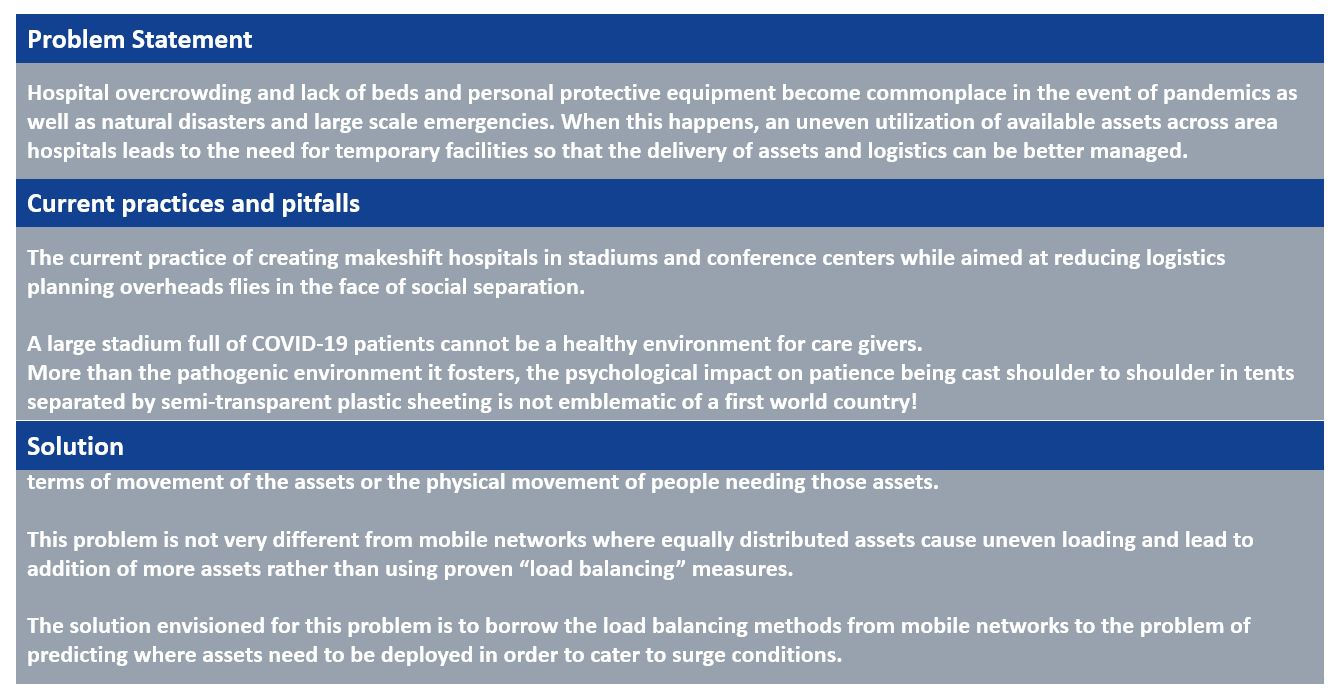

In [18]:
CLIENT_ID = 'OM1SXYU0TXVYK115IQ0RQ4RSVCA4IXPME03N54EVLCCDFLG5' # your Foursquare ID
CLIENT_SECRET = 'XDLCVG1UH5OOYYW54XN1S0MRM3X1MMEJSPA2ZSHH0FKDTOUN' # your Foursquare Secret
VERSION = '20200418' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OM1SXYU0TXVYK115IQ0RQ4RSVCA4IXPME03N54EVLCCDFLG5
CLIENT_SECRET:XDLCVG1UH5OOYYW54XN1S0MRM3X1MMEJSPA2ZSHH0FKDTOUN


# Find the category ID for hospitals and create a http query to FourSquare to get 10 hospitals centred around each neighborhood
### The four square database returns only postal codes for each hospital so we will find all hospitals around each postal code###

# Get rid of data that we will not need. Since we are iterating for each neighborhood and finding the 10 closest hospitals, 
## the distance and postal codes along with the hospital names are the data of interest to map to the nieghborhood data that we already have mapped

In [57]:
LIMIT = 20 # limit of number of hospitals returned by Foursquare API for each neighborhood to 10

categoryID= '4bf58dd8d48988d196941735' # category for hospitals
df_hosp= pd.DataFrame()

# Copy relevant entries from the dictionary into a dataframe
for lat, lng, postal in zip(df_cn_data['Latitude'], df_cn_data['Longitude'], df_cn_data['Postal code']):
    # create URL
    foursquare_url = 'https://api.foursquare.com/v2/venues/search?ll={},{}&categoryId={}&client_id={}&client_secret={}&limit={}&v={}'.format(
    lat, 
    lng,
    categoryID,
    CLIENT_ID, 
    CLIENT_SECRET, 
    LIMIT,
    VERSION)
 
    t_hosp= requests.get(foursquare_url).json()
    hospitals= t_hosp['response']['venues']
    df= json_normalize(hospitals)
           
    # Remove the unncessary columns
    # for each list of hospitals build a master dataframe
    df.drop(['hasPerk', 'categories','id', 'location.cc', 'location.crossStreet','location.address', 'location.city', 'location.country', 'location.formattedAddress', 'location.labeledLatLngs', 'location.state', 'referralId'], axis=1, inplace=True)
    # Create a new column that has the first part of the postal code
    new= df['location.postalCode'].str.split(" ",n= 1, expand=True)
    df["postal Prefix"]= new[0]
    # Append this new data frame to the last one
    df_hosp= df_hosp.append(df, ignore_index= True)

# We now have a dictionary object with hospital names and location for each postal code etc #
## we can now create a dataframe that contains the relevant data and map them into each neighborhood based on the Postal Codes ##

In [59]:
# List the unique hospital names
hospital_names= df_hosp['name'].value_counts()
hospital_names

The Hospital for Sick Children (SickKids)               103
Princess Margaret Cancer Centre                         103
Rouge Valley Centenary Hospital                         103
St. Joseph's Health Centre                              103
Women's College Hospital                                103
Toronto General Hospital                                103
Michael Garron Hospital                                 103
Providence HealthCare                                   103
Toronto Western Hospital                                103
Toronto Rehabilitation Institute                        103
Sunnybrook Health Sciences Centre                       103
Mount Sinai Hospital                                    103
Humber River Hospital                                   103
North York General Hospital                             103
Bridgepoint Health                                      103
Etobicoke General Hospital                               99
Trillium Health Centre                  

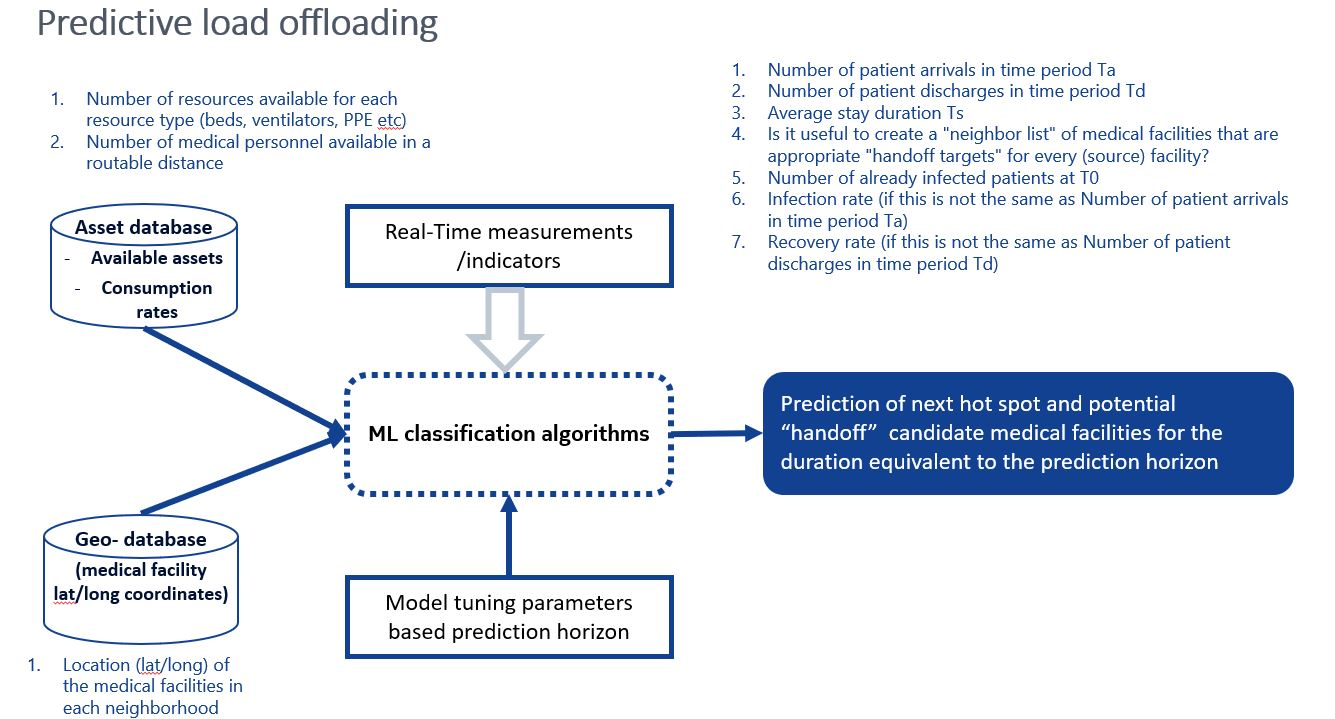

## In week#5's assignment, I will implement the algorithms to perform the load balancing function